In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive/ml_workplace/Cross_Similarity_SeungMin"

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install dominate

In [ ]:
!pip install torchmetrics

In [ ]:
!pip install torchinfo

In [ ]:
!pip install torchshow

In [ ]:
!python Visualizer.py --model resnet34 --dataroot ./dataset/heads --gpu 0 --name resnet34/OldHospital


Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1L2z3Wj67Y2wHk1alVZGxXAv3uJ5Rv3hy/ml_workplace/Cross_Similarity_SeungMin/Visualizer.py", line 18, in <module>
    opt = TestOptions().parse()
  File "/content/drive/.shortcut-targets-by-id/1L2z3Wj67Y2wHk1alVZGxXAv3uJ5Rv3hy/ml_workplace/Cross_Similarity_SeungMin/options/base_options.py", line 54, in parse
    torch.cuda.set_device(self.opt.gpu_ids[0])
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py", line 350, in set_device
    torch._C._cuda_setDevice(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py", line 247, in _lazy_init
    torch._C._cuda_init()
RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx


In [ ]:
!cd /content/drive/MyDrive/ml_workplace/Cross_Similarity_SeungMin


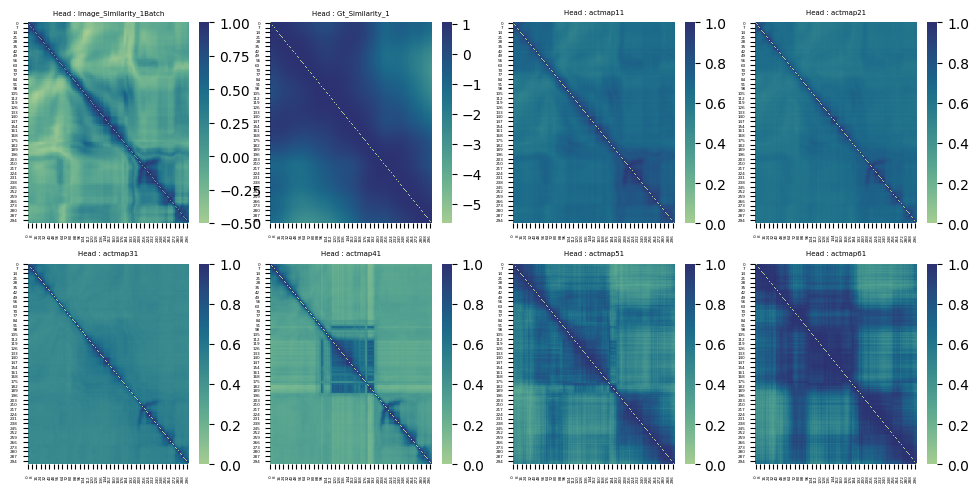

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import numpy as np
from matplotlib.colors import LogNorm, Normalize

gt_Sim = np.load(os.path.join("Image/heads" , 'gt.npy'))
img_Sim = np.load(os.path.join("Image/heads" , 'img.npy'))
act1_Sim = np.load(os.path.join("Image/heads" , 'act1.npy'))
act2_Sim = np.load(os.path.join("Image/heads" , 'act2.npy'))
act3_Sim = np.load(os.path.join("Image/heads" , 'act3.npy'))
act4_Sim = np.load(os.path.join("Image/heads" , 'act4.npy'))
act5_Sim = np.load(os.path.join("Image/heads" , 'act5.npy'))
act6_Sim = np.load(os.path.join("Image/heads" , 'act6.npy'))


def similarity_Plot(batch_List):

  size = len(batch_List) + 1 if len(batch_List) >= 9 else 9

  size = (int)(size/2)

  fig = plt.figure(figsize=(12,12))
  
  for i, batch in enumerate(batch_List):

    plt.subplot(size,size,i+1)
    plt.title('Head : Image_Similarity_%sBatch'%str(i+1), fontsize=5)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    
    sns.heatmap(img_Sim[:batch, :batch], cmap="crest")

    #Normalization
    norm_Gt_Sim=(gt_Sim-gt_Sim.mean())/gt_Sim.std()
    plt.subplot(size,size,i+2)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : Gt_Similarity_%s'%str(i+1), fontsize=5)
    sns.heatmap(norm_Gt_Sim[:batch, :batch], cmap="crest")

    plt.subplot(size,size,i+3)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap1%s'%str(i+1), fontsize=5)
    sns.heatmap(act1_Sim[:batch, :batch], cmap="crest")
    
    plt.subplot(size,size,i+4)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap2%s'%str(i+1), fontsize=5)
    sns.heatmap(act2_Sim[:batch, :batch], cmap="crest")

    plt.subplot(size,size,i+5)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap3%s'%str(i+1), fontsize=5)
    sns.heatmap(act3_Sim[:batch, :batch], cmap="crest")

    plt.subplot(size,size,i+6)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap4%s'%str(i+1), fontsize=5)
    sns.heatmap(act4_Sim[:batch, :batch], cmap="crest")

    plt.subplot(size,size,i+7)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap5%s'%str(i+1), fontsize=5)
    sns.heatmap(act5_Sim[:batch, :batch], cmap="crest")

    plt.subplot(size,size,i+8)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap6%s'%str(i+1), fontsize=5)
    sns.heatmap(act6_Sim[:batch, :batch], cmap="crest")

  plt.show()

batch_List = [300]

similarity_Plot(batch_List)

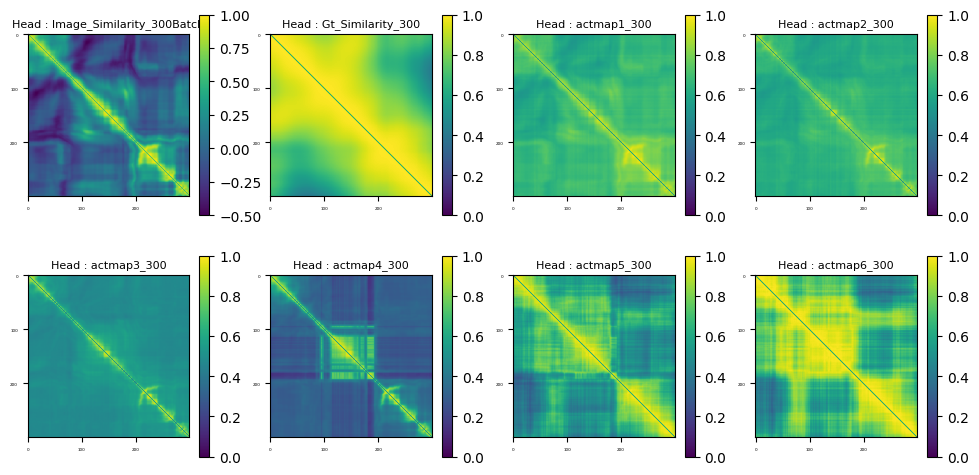

In [ ]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
%matplotlib inline

def similarity_Plot(batch_List):

  size = len(batch_List) + 1 if len(batch_List) >= 9 else 9

  size = (int)(size/2)

  fig = plt.figure(figsize=(12,12))
  
  for i, batch in enumerate(batch_List):

    plt.subplot(size,size,i+1)
    plt.title('Head : Image_Similarity_%sBatch'%str(batch), fontsize=8)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.imshow(img_Sim[:batch, :batch])
    plt.colorbar()

    #Normalization
    norm_Gt_Sim=(gt_Sim-gt_Sim.mean())/gt_Sim.std()
    plt.subplot(size,size,i+2)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : Gt_Similarity_%s'%str(batch), fontsize=8)
    plt.imshow(gt_Sim[:batch, :batch])
    plt.colorbar()

    plt.subplot(size,size,i+3)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap1_%s'%str(batch), fontsize=8)
    plt.imshow(act1_Sim[:batch, :batch])
    plt.colorbar()
    
    plt.subplot(size,size,i+4)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap2_%s'%str(batch), fontsize=8)
    plt.imshow(act2_Sim[:batch, :batch])
    plt.colorbar()

    plt.subplot(size,size,i+5)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap3_%s'%str(batch), fontsize=8)
    plt.imshow(act3_Sim[:batch, :batch])
    plt.colorbar()

    plt.subplot(size,size,i+6)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap4_%s'%str(batch), fontsize=8)
    plt.imshow(act4_Sim[:batch, :batch])
    plt.colorbar()

    plt.subplot(size,size,i+7)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap5_%s'%str(batch), fontsize=8)
    plt.imshow(act5_Sim[:batch, :batch])
    plt.colorbar()

    plt.subplot(size,size,i+8)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.title('Head : actmap6_%s'%str(batch), fontsize=8)
    plt.imshow(act6_Sim[:batch, :batch])
    plt.colorbar()

  plt.show()

batch_List = [300]

similarity_Plot(batch_List)
